<a href="https://colab.research.google.com/github/nnarey/FIFA-World-Ranking/blob/main/Copy_of_Dreamers_Crypto_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98000,121.64646,4.00000,125.08000,112.72359,1.00000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54000,965.50531,12.00000,879.94000,793.61270,0.00000
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06000,2066.96399,5.00000,0.00000,0.00000,0.00000
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59000,6175.00091,19.00000,1786.30000,1610.14948,0.00000
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30000,750.22262,3.00000,784.82000,707.42890,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00000,58630.16280,144.00000,54216.00000,23325.92770,1.00000
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00000,44967.83760,99.00000,52232.00000,22484.03040,1.00000
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00000,91526.98720,177.00000,108324.00000,46673.06160,0.00000
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00000,56443.00380,107.00000,32713.00000,14097.14890,0.00000


In [ ]:
df_test

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,0,1652817480,0.43060,0.43080,0.43010,0.43010,101150.00000,43542.26290,105.00000,46109.00000,19851.72370
1,1,1652817540,0.43010,0.43030,0.42930,0.43020,275647.00000,118478.96890,228.00000,91260.00000,39217.63120
2,2,1652817600,0.43020,0.43020,0.42920,0.42990,134959.00000,57979.24180,156.00000,56685.00000,24357.54480
3,3,1652817660,0.42990,0.43030,0.42990,0.43010,316209.00000,135979.40400,121.00000,161740.00000,69552.26910
4,4,1652817720,0.43020,0.43070,0.43020,0.43030,107440.00000,46243.79930,113.00000,31096.00000,13384.33840
...,...,...,...,...,...,...,...,...,...,...,...
909612,909612,1707394200,0.51410,0.51440,0.51410,0.51430,115358.00000,59321.71240,64.00000,103183.00000,53061.65050
909613,909613,1707394260,0.51440,0.51440,0.51420,0.51430,100017.00000,51433.47440,59.00000,29333.00000,15084.37920
909614,909614,1707394320,0.51430,0.51440,0.51420,0.51420,51665.00000,26573.98770,46.00000,33916.00000,17445.99110
909615,909615,1707394380,0.51430,0.51440,0.51430,0.51430,28063.00000,14433.07170,35.00000,16810.00000,8645.65380


In [ ]:
data = pd.read_csv('test.csv', encoding='utf-8', engine='python')
print(f"Number of rows: {len(data)}")



Number of rows: 909617


In [ ]:
df_train["change"] = df_train["close"] - df_train["open"]
df_train["change from high"] = df_train["close"] - df_train["high"]
df_train["change from low"] = df_train["close"] - df_train["low"]
df_train["current movement"] = df_train["change from low"] + df_train["change from high"]
pd.options.display.float_format = '{:.5f}'.format
df_train['movement'] = df_train['change'].apply(lambda x: 1.0 if abs(x) > 0.00001 else 0.0)
df_train

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,change,change from high,change from low,current movement,movement
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98000,121.64646,4.00000,125.08000,112.72359,1.00000,0.00010,0.00000,0.00010,0.00010,1.00000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54000,965.50531,12.00000,879.94000,793.61270,0.00000,0.00010,0.00000,0.00010,0.00010,1.00000
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06000,2066.96399,5.00000,0.00000,0.00000,0.00000,-0.00001,-0.00001,0.00000,-0.00001,0.00000
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59000,6175.00091,19.00000,1786.30000,1610.14948,0.00000,0.00000,-0.00001,0.00001,0.00000,0.00000
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30000,750.22262,3.00000,784.82000,707.42890,0.00000,-0.00009,-0.00009,0.00000,-0.00009,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00000,58630.16280,144.00000,54216.00000,23325.92770,1.00000,-0.00020,-0.00020,0.00050,0.00030,1.00000
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00000,44967.83760,99.00000,52232.00000,22484.03040,1.00000,0.00020,-0.00020,0.00020,-0.00000,1.00000
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00000,91526.98720,177.00000,108324.00000,46673.06160,0.00000,0.00040,-0.00030,0.00040,0.00010,1.00000
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00000,56443.00380,107.00000,32713.00000,14097.14890,0.00000,-0.00050,-0.00050,0.00020,-0.00030,1.00000


# Without target for intuiton

In [ ]:
df_train.drop('target', axis=1)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,change,change from high,change from low,current movement,movement
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98000,121.64646,4.00000,125.08000,112.72359,0.00010,0.00000,0.00010,0.00010,1.00000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54000,965.50531,12.00000,879.94000,793.61270,0.00010,0.00000,0.00010,0.00010,1.00000
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06000,2066.96399,5.00000,0.00000,0.00000,-0.00001,-0.00001,0.00000,-0.00001,0.00000
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59000,6175.00091,19.00000,1786.30000,1610.14948,0.00000,-0.00001,0.00001,0.00000,0.00000
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30000,750.22262,3.00000,784.82000,707.42890,-0.00009,-0.00009,0.00000,-0.00009,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00000,58630.16280,144.00000,54216.00000,23325.92770,-0.00020,-0.00020,0.00050,0.00030,1.00000
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00000,44967.83760,99.00000,52232.00000,22484.03040,0.00020,-0.00020,0.00020,-0.00000,1.00000
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00000,91526.98720,177.00000,108324.00000,46673.06160,0.00040,-0.00030,0.00040,0.00010,1.00000
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00000,56443.00380,107.00000,32713.00000,14097.14890,-0.00050,-0.00050,0.00020,-0.00030,1.00000


In [ ]:
df_test["change"] = df_test["close"] - df_test["open"]
df_test["change from high"] = df_test["close"] - df_test["high"]
df_test["change from low"] = df_test["close"] - df_test["low"]
df_test["current movement"] = df_test["change from low"] + df_test["change from high"]
df_test['movement'] = df_test['change'].apply(lambda x: 1.0 if abs(x) > 0.00001 else 0.0)
df_test

,row_id,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,change,change from high,change from low,current movement,movement
0,0,1652817480,0.43060,0.43080,0.43010,0.43010,101150.00000,43542.26290,105.00000,46109.00000,19851.72370,-0.00050,-0.00070,0.00000,-0.00070,1.00000
1,1,1652817540,0.43010,0.43030,0.42930,0.43020,275647.00000,118478.96890,228.00000,91260.00000,39217.63120,0.00010,-0.00010,0.00090,0.00080,1.00000
2,2,1652817600,0.43020,0.43020,0.42920,0.42990,134959.00000,57979.24180,156.00000,56685.00000,24357.54480,-0.00030,-0.00030,0.00070,0.00040,1.00000
3,3,1652817660,0.42990,0.43030,0.42990,0.43010,316209.00000,135979.40400,121.00000,161740.00000,69552.26910,0.00020,-0.00020,0.00020,-0.00000,1.00000
4,4,1652817720,0.43020,0.43070,0.43020,0.43030,107440.00000,46243.79930,113.00000,31096.00000,13384.33840,0.00010,-0.00040,0.00010,-0.00030,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909612,909612,1707394200,0.51410,0.51440,0.51410,0.51430,115358.00000,59321.71240,64.00000,103183.00000,53061.65050,0.00020,-0.00010,0.00020,0.00010,1.00000
909613,909613,1707394260,0.51440,0.51440,0.51420,0.51430,100017.00000,51433.47440,59.00000,29333.00000,15084.37920,-0.00010,-0.00010,0.00010,0.00000,1.00000
909614,909614,1707394320,0.51430,0.51440,0.51420,0.51420,51665.00000,26573.98770,46.00000,33916.00000,17445.99110,-0.00010,-0.00020,0.00000,-0.00020,1.00000
909615,909615,1707394380,0.51430,0.51440,0.51430,0.51430,28063.00000,14433.07170,35.00000,16810.00000,8645.65380,0.00000,-0.00010,0.00000,-0.00010,0.00000


In [ ]:
df_train_abs = df_train
df_train_abs["change"] = df_train_abs["change"].abs()
df_train_abs["change from high"] = df_train_abs["change from high"].abs()
df_train_abs["change from low"] = df_train_abs["change from low"].abs()
df_train_abs["current movement"] = df_train_abs["current movement"].abs()
df_train_abs

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,change,change from high,change from low,current movement,movement
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98000,121.64646,4.00000,125.08000,112.72359,1.00000,0.00010,0.00000,0.00010,0.00010,1.00000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54000,965.50531,12.00000,879.94000,793.61270,0.00000,0.00010,0.00000,0.00010,0.00010,1.00000
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06000,2066.96399,5.00000,0.00000,0.00000,0.00000,0.00001,0.00001,0.00000,0.00001,0.00000
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59000,6175.00091,19.00000,1786.30000,1610.14948,0.00000,0.00000,0.00001,0.00001,0.00000,0.00000
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30000,750.22262,3.00000,784.82000,707.42890,0.00000,0.00009,0.00009,0.00000,0.00009,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00000,58630.16280,144.00000,54216.00000,23325.92770,1.00000,0.00020,0.00020,0.00050,0.00030,1.00000
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00000,44967.83760,99.00000,52232.00000,22484.03040,1.00000,0.00020,0.00020,0.00020,0.00000,1.00000
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00000,91526.98720,177.00000,108324.00000,46673.06160,0.00000,0.00040,0.00030,0.00040,0.00010,1.00000
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00000,56443.00380,107.00000,32713.00000,14097.14890,0.00000,0.00050,0.00050,0.00020,0.00030,1.00000


In [ ]:
from scipy.stats import pointbiserialr

features = ["open", "high", "low", "close", "volume",	"quote_asset_volume",	"number_of_trades",	"taker_buy_base_volume",	"taker_buy_quote_volume",	"target",	"change",	"change from high",	"change from low",	"current movement",	"movement"]

# Calculate point-biserial correlation
for feature in features:
    corr, p_value = pointbiserialr(df_train[feature].fillna(0), df_train["movement"].fillna(0))
    print(f"Point-Biserial Correlation between {feature} and movement: {corr:.3f}, p-value: {p_value:.3f}")

Point-Biserial Correlation between open and movement: 0.033, p-value: 0.000
Point-Biserial Correlation between high and movement: 0.033, p-value: 0.000
Point-Biserial Correlation between low and movement: 0.033, p-value: 0.000
Point-Biserial Correlation between close and movement: 0.033, p-value: 0.000
Point-Biserial Correlation between volume and movement: 0.073, p-value: 0.000
Point-Biserial Correlation between quote_asset_volume and movement: 0.064, p-value: 0.000
Point-Biserial Correlation between number_of_trades and movement: 0.071, p-value: 0.000
Point-Biserial Correlation between taker_buy_base_volume and movement: 0.071, p-value: 0.000
Point-Biserial Correlation between taker_buy_quote_volume and movement: 0.063, p-value: 0.000
Point-Biserial Correlation between target and movement: 0.016, p-value: 0.000
Point-Biserial Correlation between change and movement: 0.127, p-value: 0.000
Point-Biserial Correlation between change from high and movement: 0.083, p-value: 0.000
Point-Bis

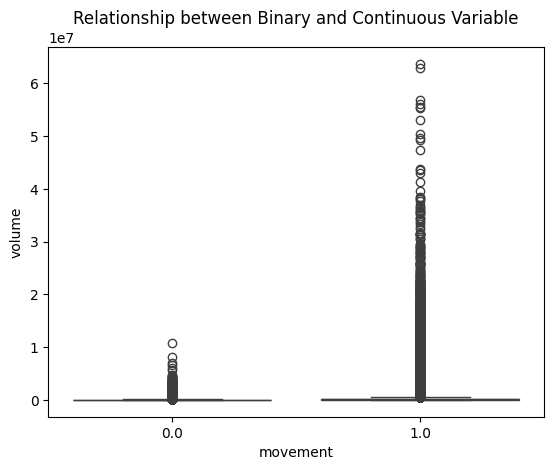

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, binary_var is the binary variable, and cont_var is the continuous variable
sns.boxplot(x='movement', y='volume', data=df_train)
plt.title('Relationship between Binary and Continuous Variable')
plt.show()


This shows that when there is a lot of volume, there is a near guarantee of movement.

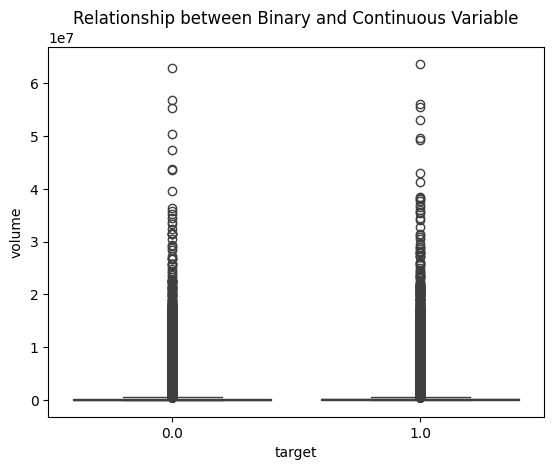

In [ ]:
sns.boxplot(x='target', y='volume', data=df_train)
plt.title('Relationship between Binary and Continuous Variable')
plt.show()

This is why we have to predict if there is movement first.

There might be overfitting here, watch out.

In [ ]:
features = ["volume", "quote_asset_volume", "number_of_trades", "current movement"]
X_train = df_train_abs[features]
y_train = df_train_abs["movement"]

In [ ]:
pipeline = make_pipeline(
    RandomForestClassifier(random_state=42))  # You can adjust the number of neighbors
pipeline.fit(X=X_train, y=y_train)
pred = pipeline.predict(X=X_train)
# Add predictions to the DataFrame
predictions_df = pd.DataFrame({'movement': pred})
#predictions_df.to_csv('predictions.csv', index=False)
predictions_df

,movement
0,1.00000
1,1.00000
2,0.00000
3,0.00000
4,1.00000
...,...
1644061,1.00000
1644062,1.00000
1644063,1.00000
1644064,1.00000


In [ ]:
predictions_df["movement"].sum() / len(predictions_df)

0.9338116596292363

In [ ]:
# Step 1: Prepare df_test by ensuring it has the same features and preprocessing as df_train
# (Assuming you have already done this preprocessing in your code)

# Step 2: Separate features and target variable in df_test
X_test = df_test[features]  # Use the same feature list as in df_train

# Step 3: Make predictions using the trained model
y_pred = pipeline.predict(X_test)
movement_preds = pd.DataFrame({'row_id': df_test['row_id'],
                          'movement': y_pred})
#predictions_df.to_csv('predictions.csv', index=False)
movement_preds

,row_id,movement
0,0,1.00000
1,1,1.00000
2,2,1.00000
3,3,1.00000
4,4,1.00000
...,...,...
909612,909612,1.00000
909613,909613,1.00000
909614,909614,1.00000
909615,909615,1.00000


In [ ]:
check = movement_preds[movement_preds["movement"] == 0]
check

,row_id,movement
306,306,0.00000
2944,2944,0.00000
3018,3018,0.00000
4726,4726,0.00000
5142,5142,0.00000
...,...,...
908827,908827,0.00000
908874,908874,0.00000
908916,908916,0.00000
909131,909131,0.00000


NONE HAVE STRONG CORRELATIONS

In [ ]:
features = ["open", "high", "low", "close", "volume",	"quote_asset_volume",	"number_of_trades",	"taker_buy_base_volume",	"taker_buy_quote_volume",	"target",	"change",	"change from high",	"change from low",	"current movement",	"movement"]

# Calculate point-biserial correlation
for feature in features:
    corr, p_value = pointbiserialr(df_train[feature], df_train["target"])
    print(f"Point-Biserial Correlation between {feature} and target: {corr:.3f}, p-value: {p_value:.3f}")

Point-Biserial Correlation between open and target: -0.004, p-value: 0.000
Point-Biserial Correlation between high and target: -0.004, p-value: 0.000
Point-Biserial Correlation between low and target: -0.004, p-value: 0.000
Point-Biserial Correlation between close and target: -0.004, p-value: 0.000
Point-Biserial Correlation between volume and target: 0.015, p-value: 0.000
Point-Biserial Correlation between quote_asset_volume and target: 0.012, p-value: 0.000
Point-Biserial Correlation between number_of_trades and target: 0.014, p-value: 0.000
Point-Biserial Correlation between taker_buy_base_volume and target: 0.013, p-value: 0.000
Point-Biserial Correlation between taker_buy_quote_volume and target: 0.011, p-value: 0.000
Point-Biserial Correlation between target and target: 1.000, p-value: 0.000
Point-Biserial Correlation between change and target: 0.013, p-value: 0.000
Point-Biserial Correlation between change from high and target: 0.028, p-value: 0.000
Point-Biserial Correlation be

In [ ]:
df_train

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,change,change from high,change from low,current movement,movement
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98000,121.64646,4.00000,125.08000,112.72359,1.00000,0.00010,0.00000,0.00010,0.00010,1.00000
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54000,965.50531,12.00000,879.94000,793.61270,0.00000,0.00010,0.00000,0.00010,0.00010,1.00000
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06000,2066.96399,5.00000,0.00000,0.00000,0.00000,-0.00001,-0.00001,0.00000,-0.00001,0.00000
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59000,6175.00091,19.00000,1786.30000,1610.14948,0.00000,0.00000,-0.00001,0.00001,0.00000,0.00000
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30000,750.22262,3.00000,784.82000,707.42890,0.00000,-0.00009,-0.00009,0.00000,-0.00009,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122433,1652817240,0.43060,0.43060,0.42990,0.43040,136274.00000,58630.16280,144.00000,54216.00000,23325.92770,1.00000,-0.00020,-0.00020,0.00050,0.00030,1.00000
2122434,1652817300,0.43030,0.43070,0.43030,0.43050,104478.00000,44967.83760,99.00000,52232.00000,22484.03040,1.00000,0.00020,-0.00020,0.00020,-0.00000,1.00000
2122435,1652817360,0.43050,0.43120,0.43050,0.43090,212396.00000,91526.98720,177.00000,108324.00000,46673.06160,0.00000,0.00040,-0.00030,0.00040,0.00010,1.00000
2122436,1652817420,0.43110,0.43110,0.43040,0.43060,131047.00000,56443.00380,107.00000,32713.00000,14097.14890,0.00000,-0.00050,-0.00050,0.00020,-0.00030,1.00000


In [ ]:
features = ['open', 'close', 'high', 'low', 'volume', 'current movement']
X_train = df_train[features]
y_train = df_train['target'].fillna(0)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = make_pipeline(
    RandomForestClassifier(random_state=42))  # You can adjust the number of neighbors
pipeline.fit(X=X_train, y=y_train)
pred = pipeline.predict(X=X_train)
# Add predictions to the DataFrame
predictions_df = pd.DataFrame({'target': pred})
#predictions_df.to_csv('predictions.csv', index=False)
predictions_df

,target
0,1.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000
...,...
2122433,1.00000
2122434,1.00000
2122435,0.00000
2122436,0.00000


In [ ]:
# Step 1: Prepare df_test by ensuring it has the same features and preprocessing as df_train
# (Assuming you have already done this preprocessing in your code)

# Step 2: Separate features and target variable in df_test
X_test = df_test[features]  # Use the same feature list as in df_train

# Step 3: Make predictions using the trained model
y_pred = pipeline.predict(X_test)
new_preds = pd.DataFrame({'row_id': df_test['row_id'],
                          'target': y_pred})
#predictions_df.to_csv('predictions.csv', index=False)
new_preds

,row_id,target
0,0,1.00000
1,1,0.00000
2,2,0.00000
3,3,0.00000
4,4,0.00000
...,...,...
909612,909612,0.00000
909613,909613,1.00000
909614,909614,1.00000
909615,909615,0.00000


In [ ]:
new_preds["movement"] = movement_preds["movement"]
check = new_preds[new_preds["movement"] == 0]
check

,row_id,target,movement
306,306,0.00000,0.00000
2944,2944,0.00000,0.00000
3018,3018,0.00000,0.00000
4726,4726,0.00000,0.00000
5142,5142,1.00000,0.00000
...,...,...,...
908827,908827,0.00000,0.00000
908874,908874,1.00000,0.00000
908916,908916,1.00000,0.00000
909131,909131,0.00000,0.00000


In [ ]:
new_preds.loc[new_preds['movement'] == 0, 'target'] = 0
new_preds

,row_id,target,movement
0,0,1.00000,1.00000
1,1,0.00000,1.00000
2,2,0.00000,1.00000
3,3,0.00000,1.00000
4,4,0.00000,1.00000
...,...,...,...
909612,909612,0.00000,1.00000
909613,909613,1.00000,1.00000
909614,909614,1.00000,1.00000
909615,909615,0.00000,1.00000


In [ ]:
new_preds = new_preds.drop("movement", axis=1)
new_preds

,row_id,target
0,0,1.00000
1,1,0.00000
2,2,0.00000
3,3,0.00000
4,4,0.00000
...,...,...
909612,909612,0.00000
909613,909613,1.00000
909614,909614,1.00000
909615,909615,0.00000


In [ ]:
new_preds.to_csv('submit7.csv', index=False)

In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>